In [65]:
from PIL import Image
import os
import matplotlib.pyplot as plt

In [66]:
# Path to the directory containing the images
directory = r'C:\Users\HP\Desktop\Projekt ML Data Science\human-age-detection\train\data\imdb_crop\00'

In [67]:
# List of image files in the directory
image_files = [f for f in os.listdir(directory) if f.endswith('.jpg')]

In [68]:
len(image_files) # Number of image files in the directory

3862

In [83]:
# This function is used to display several (user-specified number) images from the selected directory
def display_images(images, num_cols=4):
    num_images = len(images)
    num_rows = (num_images + num_cols - 1) // num_cols
    plt.figure(figsize=(12, 8))
    for i, image_file in enumerate(images):
        img = Image.open(os.path.join(directory, image_file))
        plt.subplot(num_rows, num_cols, i + 1)
        plt.imshow(img)
        plt.title(image_file, fontdict = {'fontsize' : 6})
        plt.axis('off')
    plt.show()

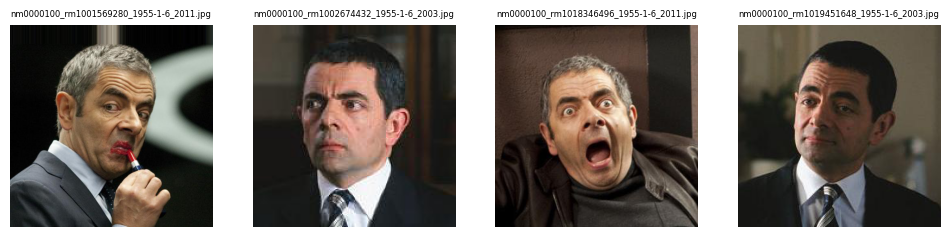

In [84]:
display_images(image_files[:4])

In [88]:
# Przykładowe statystyki o obrazach
for image_file in image_files[:8]:
    img = Image.open(os.path.join(directory, image_file))
    width, height = img.size
    mode = img.mode
    print(f'File name: {image_file}, Size: {width}x{height}, Mode: {mode}')

File name: nm0000100_rm1001569280_1955-1-6_2011.jpg, Size: 500x500, Mode: RGB
File name: nm0000100_rm1002674432_1955-1-6_2003.jpg, Size: 171x171, Mode: RGB
File name: nm0000100_rm1018346496_1955-1-6_2011.jpg, Size: 315x315, Mode: RGB
File name: nm0000100_rm1019451648_1955-1-6_2003.jpg, Size: 252x252, Mode: RGB
File name: nm0000100_rm103389184_1955-1-6_2005.jpg, Size: 334x334, Mode: RGB
File name: nm0000100_rm1035123712_1955-1-6_2011.jpg, Size: 334x500, Mode: RGB
File name: nm0000100_rm1036228864_1955-1-6_2003.jpg, Size: 105x106, Mode: RGB
File name: nm0000100_rm1051900928_1955-1-6_2011.jpg, Size: 500x500, Mode: RGB


In [97]:
mean_color = np.mean(image_file, axis=(0, 1))
print(f"Średni kolor (BGR) {image_file}: {mean_color}")

AxisError: axis 0 is out of bounds for array of dimension 0